In [1]:


import pandas as pd
import numpy as np
from keras.layers import Dense, Conv2D, Dropout, Flatten
from keras.models import Sequential
from keras.layers import MaxPool2D
import os
from PIL import Image

In [2]:
train="train"
test="test"


In [3]:
#storing the path in the list
y_train=[]
x_train=[]
for i in os.listdir(train):
    for j in os.listdir(os.path.join(train,i)):
        y_train.append(i)
        x_train.append(os.path.join(train,i,j))

In [4]:
x_train[1]

'train\\angry\\Training_10120469.jpg'

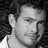

In [5]:
Image.open(x_train[1])

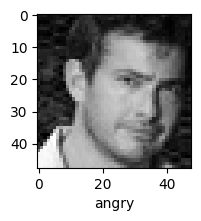

In [7]:
import matplotlib.pyplot as plt

a = Image.open(x_train[1])
plt.figure(figsize=(3,2))
plt.imshow(a, cmap='gray')
plt.xlabel(y_train[1])
plt.show()


In [8]:
np.array(a).shape

(48, 48)

In [9]:
print("size of y" ,len(y_train))
print("size of x",len(x_train))

size of y 28709
size of x 28709


In [10]:
img = []
for path in x_train:
    image = Image.open(path)
    img.append(np.array(image))

In [11]:
img[1]

array([[ 29,  24,  29, ...,  11,  12,  17],
       [ 17,  14,  14, ...,  15,  20,  23],
       [  0,   4,   3, ...,  33,  35,  23],
       ...,
       [250, 248, 247, ...,  44,  47,  43],
       [247, 248, 248, ...,  41,  58,  55],
       [249, 248, 244, ...,  15,  24,  24]], shape=(48, 48), dtype=uint8)

In [12]:
img[1].shape

(48, 48)

In [13]:

x_train=np.array(img)
x_train=x_train/255
y_train=np.array(y_train)

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)#0,1,2,3,4,5,6

In [16]:
y_test=[]
x_test=[]
for i in os.listdir(test):
    for j in os.listdir(os.path.join(test,i)):
        y_test.append(i)
        x_test.append(os.path.join(test,i,j))
        

In [17]:
print("size of x test",len(x_test))
print("size of y test",len(y_test))

size of x test 7178
size of y test 7178


In [18]:
img=[]
for i in x_test:
    image=Image.open(i)
    img.append(np.array(image))

In [19]:
x_test=np.array(img)
x_test=x_test/255
y_test=np.array(y_test)


In [20]:

model=Sequential([
    #1st convo layer
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)),
    # 1st pooling layer
    MaxPool2D(pool_size=(2, 2)),
    # 2nd convo layer
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),    
    #2nd pooling layer
    MaxPool2D(pool_size=(2, 2)),
    #Dropout layer
    Dropout(0.2),
    #3rd convo layer
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),    
    #3rd pooling layer
    MaxPool2D(pool_size=(2, 2)),
    #4th convo layer
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),    
    #4th pooling layer
    MaxPool2D(pool_size=(2, 2)),
    # Dropout layer
    Dropout(0.2),
    # Flattens the input
    Flatten(),
    # Dense layer
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')    
])
    
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

c:\Users\lenovo\Desktop\Infosys springboard\virtual\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.fit(x_train,y_train,epochs=20, batch_size=30)


Epoch 1/20
957/957 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.2549 - loss: 1.7952
Epoch 2/20
957/957 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.3770 - loss: 1.5798
Epoch 3/20
957/957 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4461 - loss: 1.4236
Epoch 4/20
957/957 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4781 - loss: 1.3464
Epoch 5/20
957/957 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.5054 - loss: 1.2823
Epoch 6/20
957/957 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.5290 - loss: 1.2380
Epoch 7/20
957/957 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.5455 - loss: 1.1952
Epoch 8/20
957/957 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.5567 - loss: 1.1654
Epoch 9/20
957/957 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.5661 - loss: 1.1366
Epoch 10/20
957/957 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.5802 - loss: 1.1058
Epoch 11/20
957/957 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.5867 - loss: 1.0871
Epoch 12/20
957/957 ━━━━━━━━━━

In [27]:
predictions = model.predict(x_test)




225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [28]:
print("Shape of y_test:", y_test.shape)
print("Shape of predictions:", predictions.shape)
print("shape of x_test:", x_test.shape)

Shape of y_test: (7178,)
Shape of predictions: (7178, 7)
shape of x_test: (7178, 48, 48)


In [29]:

predictions = np.argmax(predictions, axis=1)

predictions=le.inverse_transform(predictions)

In [30]:
from sklearn.metrics import accuracy_score
print(pd.DataFrame({'Actual': y_test[:10], 'Predicted': predictions[:10]}))
print("Accuracy:", accuracy_score(y_test, predictions))

  Actual Predicted
0  angry     happy
1  angry  surprise
2  angry       sad
3  angry       sad
4  angry     angry
5  angry      fear
6  angry  surprise
7  angry     angry
8  angry   neutral
9  angry     angry
Accuracy: 0.5834494288102535
